In [49]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [12]:
import gzip

In [8]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [18]:
df = pd.read_csv('./Dataset/train_modified.csv')

In [25]:
target = 'Disbursed'
IDcol = 'ID'

In [19]:
df.head()

,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
df.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

## Descriptive

In [22]:
df.describe()

,Disbursed,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
count,87020.000000,8.702000e+04,8.702000e+04,87020.000000,8.702000e+04,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,...,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000
mean,0.014629,3.693212e+03,2.301444e+05,2.131292,5.884997e+04,2.949805,4.961503,30.904171,0.681384,0.681384,...,0.163296,0.007286,0.015111,0.006251,0.379591,0.350942,0.649058,0.443197,0.343427,0.213376
std,0.120062,3.979411e+04,3.540818e+05,2.013375,2.177511e+06,1.697720,5.670385,7.147194,0.465943,0.465943,...,0.369637,0.085045,0.121997,0.078819,0.485288,0.477268,0.477268,0.496766,0.474855,0.409693
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.650000e+04,1.000000,0.000000,26.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,1.000000e+05,2.000000,2.500000e+04,3.000000,2.000000,29.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.500000e+03,3.000000e+05,4.000000,4.000000e+04,5.000000,11.000000,34.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000e+07,1.000000e+07,10.000000,4.445544e+08,7.000000,18.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Disbursed                      87020 non-null  float64
 1   Existing_EMI                   87020 non-null  float64
 2   ID                             87020 non-null  object 
 3   Loan_Amount_Applied            87020 non-null  float64
 4   Loan_Tenure_Applied            87020 non-null  float64
 5   Monthly_Income                 87020 non-null  int64  
 6   Var4                           87020 non-null  int64  
 7   Var5                           87020 non-null  int64  
 8   Age                            87020 non-null  int64  
 9   EMI_Loan_Submitted_Missing     87020 non-null  int64  
 10  Interest_Rate_Missing          87020 non-null  int64  
 11  Loan_Amount_Submitted_Missing  87020 non-null  int64  
 12  Loan_Tenure_Submitted_Missing  87020 non-null 

In [28]:
df[target].value_counts()

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

## Parameter Tuning

In [74]:
def modelfit(alg, x, y, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(x, y)
    
    #predict training set:
    dtrain_predictions = alg.predict(x)
    dtrain_predprob = alg.predict_proba(x)[:,1]
    
    #Perform cross-validation
    if performCV:
        cv_score = cross_val_score(alg, x, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob)) 
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #print feature importance
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [63]:
features = [x for x in df.columns if x not in [target, IDcol]]
x = df[features]
y = df[target]

In [66]:
gbm0 = GradientBoostingClassifier(random_state=10)


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.862264
CV Score : Mean - 0.8318846 | Std - 0.009558541 | Min - 0.8195451 | Max - 0.8438424


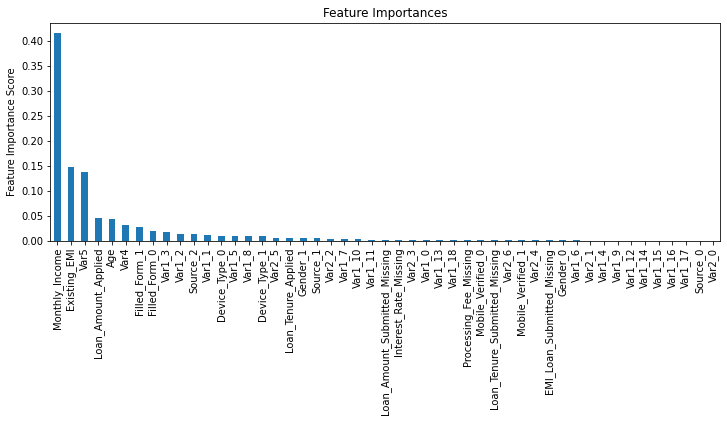

In [75]:
modelfit(gbm0, x, y, predictors)